In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import matplotlib.colors as mcolors
sns.reset_defaults()
sns.set_theme(context='paper',style='white',palette=sns.color_palette("bright"),font_scale=1.5,font='serif')


c:\NMBU\Miniconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():
c:\NMBU\Miniconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


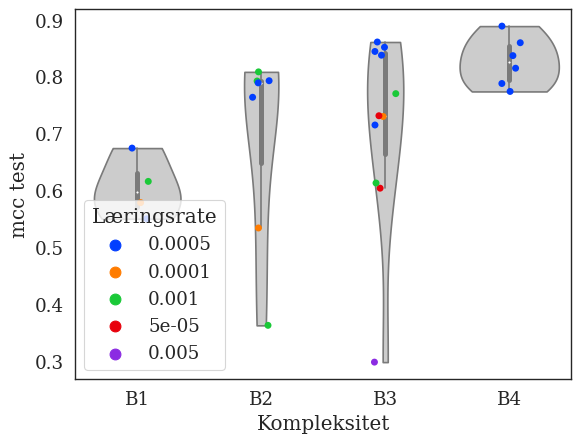

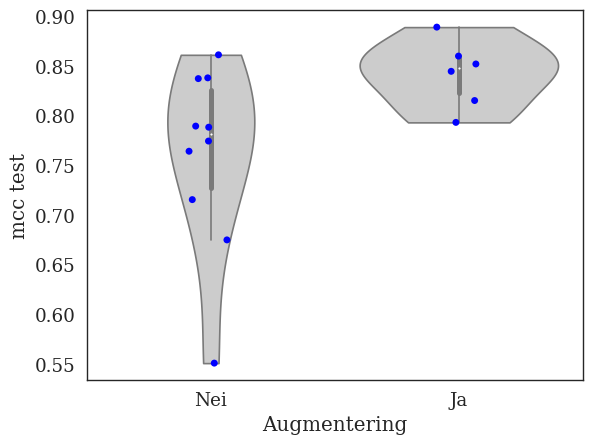

In [7]:
filename = 'C:/Users/sunnivas/OneDrive - Norwegian University of Life Sciences/Documents/code/cubiai/sunniva/Elbow_Experiments.xlsx'
#filename = '/Users/sunnivasteiro/Library/CloudStorage/OneDrive-NorwegianUniversityofLifeSciences/Documents/code/cubiai/sunniva/Elbow_Experiments.xlsx'
filename = 'C:/Users/sunnivas/OneDrive - Norwegian University of Life Sciences/Documents/Elbow_Experiments.xlsx'
xx = pd.read_excel(filename,sheet_name='Binary Experiments',header=0)

df = xx[xx['Problem type']=='normal/abnormal']

plt.figure()
sns.violinplot(data=df,x='Kompleksitet',y='mcc test',cut=0,color="0.8")
sns.stripplot(data=df,x='Kompleksitet',y='mcc test',jitter=True,hue=xx.Læringsrate.astype(str))
plt.legend(fancybox=True,loc='lower left',bbox_to_anchor=(0.,0.),title='Læringsrate')
plt.show()

plt.figure()
sns.violinplot(data=df[df.Læringsrate==0.0005],x='Augmentering',y='mcc test',cut=0,color="0.8")
sns.stripplot(data=df[df.Læringsrate==0.0005],x='Augmentering',y='mcc test',jitter=True,color="blue")
plt.show()


   AUC test  roc_auc test  BinaryAccuracy test  mcc test   f1 test  f1_0 test  \
3  0.967347      0.978830             0.926471  0.851889  0.932432   0.919355   
4  0.964381      0.976272             0.922794  0.844501  0.929293   0.914980   
1  0.960571      0.968054             0.930147  0.861108  0.933798   0.926070   
2  0.962748      0.976980             0.930147  0.859837  0.934708   0.924901   
0  0.979483      0.983020             0.944853  0.889000  0.949495   0.939271   

                model  
3       B3_0.0005_aug  
4  B3_0.0005_aug_flip  
1      B3_0.0005_flip  
2       B4_0.0005_aug  
0  B4_0.0005_aug_flip  


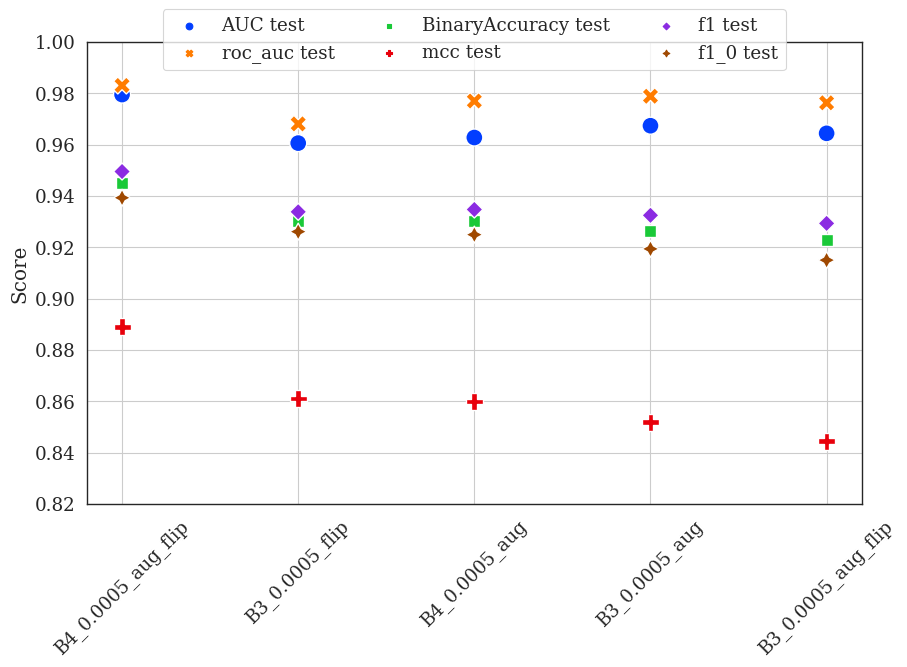

In [37]:

df=df[['AUC test', 'roc_auc test',
       'BinaryAccuracy test', 'mcc test', 'f1 test', 'f1_0 test','model']]
df_best=df.sort_values('mcc test',ascending=False).reset_index(drop=True)[:5]

print(df_best.sort_values('model'))
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_best.sort_values('model'),s=150)
plt.xticks(np.arange(len(df_best)),df_best.model,rotation=45)
plt.grid(True)
plt.yticks(np.arange(0.82,1.0,0.02))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.09),
          ncol=3, fancybox=True)
plt.ylabel("Score")

plt.show()


# for metric in df_best.columns:
#        plt.figure(figsize=(10,6))
#        sns.scatterplot(data=df_best.iloc[:5],y=metric,x='Kolonne1',s=100)
#        plt.xticks(np.arange(5),df_best.Kolonne1.iloc[:5],rotation=45)
#        plt.xlabel("Modell")
#        plt.grid(True)
#        plt.show()


################################ Utforske originalstørrelser på bilder ################################

In [7]:
###### Tar lang tid #####
"""
saved_cropped_images = '//nmbu.no/Research/Project/CubiAI/preprocess/cropped/'
os.chdir(saved_cropped_images)
df = pd.DataFrame(columns=['shape','ax0','ax1'])
for folder in os.listdir():
    # Check whether file is in text format or not
    if not folder.endswith("old"):
        path = f"{saved_cropped_images}{folder}/"
        os.chdir(path)
        print(path)

        for file in os.listdir():
            filename = f"{path}{file}"
            img = np.load(filename)
            df.loc[len(df)]=[img.shape,img.shape[0],img.shape[1]]
        os.chdir(saved_cropped_images)

ds = df.copy()
ds = ds[ds.ax0>100]
sns.histplot(data=ds)
plt.title('Size in each direction of all images')

print('mean: ',np.mean(ds.ax0),
'median: ',np.median(ds.ax0))
"""

'\nsaved_cropped_images = \'//nmbu.no/Research/Project/CubiAI/preprocess/cropped/\'\nos.chdir(saved_cropped_images)\ndf = pd.DataFrame(columns=[\'shape\',\'ax0\',\'ax1\'])\nfor folder in os.listdir():\n    # Check whether file is in text format or not\n    if not folder.endswith("old"):\n        path = f"{saved_cropped_images}{folder}/"\n        os.chdir(path)\n        print(path)\n\n        for file in os.listdir():\n            filename = f"{path}{file}"\n            img = np.load(filename)\n            df.loc[len(df)]=[img.shape,img.shape[0],img.shape[1]]\n        os.chdir(saved_cropped_images)\n\nds = df.copy()\nds = ds[ds.ax0>100]\nsns.histplot(data=ds)\nplt.title(\'Size in each direction of all images\')\n\nprint(\'mean: \',np.mean(ds.ax0),\n\'median: \',np.median(ds.ax0))\n'

################################ Utforske  ################################

In [25]:
filename = '//nmbu.no/Research/Project/CubiAI/sortering/undersøkelser sortert på år.xlsx'
meta_data = pd.read_excel(filename,sheet_name=[2,3,4,5],header=0,usecols=['ID', 'Regnr', 'Diagnose', 'Høyre', 'Venstre',
       'Alder (dager)', 'Rase ID', 'Rase', 'Født', 'Kjønn','Røntgendato',
       'Kullstørrelse', 'Chip ID'])
# Dataframe med alle hunder fra 2018-2021
meta_df=pd.concat([meta_data[2],meta_data[3],meta_data[4],meta_data[5]],axis=0,ignore_index=True)
print(meta_df.head())
# Dataframe med alle syke hunder, uten friske hunder
df_syk=meta_df[meta_df.Diagnose!=0]
# Dataframe med antall syke hunder per rase
df_rase = pd.DataFrame()
tot = len(df_syk)
for rase in np.unique(meta_df[meta_df.Diagnose!=0]['Rase']):
    df_rase.loc[len(df_rase),['rase','ant','prosent']]=rase,len(meta_df[(meta_df.Rase==rase) & (meta_df.Diagnose!=0)]),len(meta_df[(meta_df.Rase==rase) & (meta_df.Diagnose!=0)])/tot
df_rase=df_rase.sort_values('ant').reset_index(drop=True)


         ID       Regnr  Diagnose  Høyre  Venstre Røntgendato  Alder (dager)  \
0  21020613  NO32961/20         3      3        3  2021-05-20          505.0   
1  21022650  no61468/20         3      3        3  2021-05-18          202.0   
2  21023872  NO54166/20         3      3        3  2021-05-21          301.0   
3  21028558  NO58023/20         3      3        3  2021-06-19          263.0   
4  21029655  NO50294/20         3      3        3  2021-06-28          358.0   

   Rase ID                    Rase       Født     Kjønn  Kullstørrelse  \
0      436  Schäferhund  normalhår 2020-01-01     TISPE            3.0   
1      436  Schäferhund  normalhår 2020-10-28  HANNHUND            7.0   
2      209                  Beagle 2020-07-24     TISPE            4.0   
3      709       Berner Sennenhund 2020-09-29  HANNHUND            7.0   
4      345      Labrador Retriever 2020-07-05  HANNHUND            6.0   

        Chip ID  
0  5.780941e+14  
1  5.780981e+14  
2  5.780978e+14  
3 

In [9]:
print(len(meta_df),len(meta_data[2]),len(meta_data[3]),len(meta_data[4]),len(meta_data[5])) # Antall hunder i det komplette datasettet + for hvert år
print(meta_df['Alder (dager)'].describe())
len(df_syk)
2073/19878

19878 5524 5022 4773 4559
count    19559.000000
mean       634.490772
std        347.462676
min        174.000000
25%        437.000000
50%        524.000000
75%        687.000000
max       4392.000000
Name: Alder (dager), dtype: float64


0.10428614548747359

In [10]:
print(len(np.unique(meta_df.Rase))) # Antall raser i screeningprogrammet
print(len(np.unique(df_syk['Rase']))) # Antall raser blant syke hunder i screeningprogrammet
print(len(df_syk))
df_rase.tail(10)
pie_df = df_rase[df_rase['prosent']>0.05].reset_index(drop=True)
pie_df.loc[len(pie_df),['rase','ant','prosent']] = 'Andre',df_rase.ant[df_rase['prosent']<0.05].sum(),1-df_rase.prosent[df_rase['prosent']>0.05].sum()
pie_df
1-122/209

209
122
2073


0.416267942583732

################################ Utforske rasefordeling ################################

count    122.000000
mean      16.991803
std       44.067847
min        1.000000
25%        1.000000
50%        3.000000
75%       11.000000
max      292.000000
Name: ant, dtype: float64


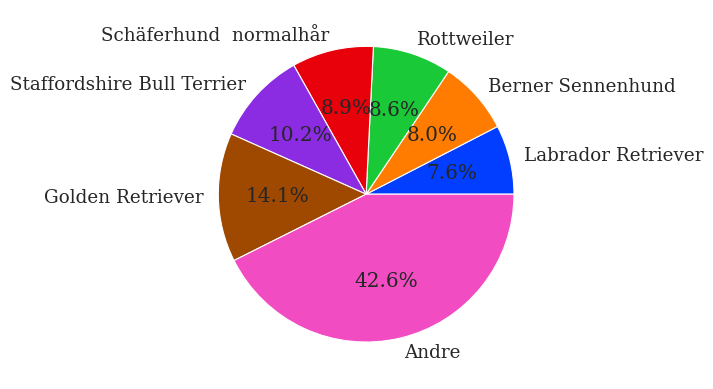

In [32]:

print(df_rase.ant.describe())
plt.figure()
plt.pie(data=pie_df,x='prosent',labels='rase',normalize=False,autopct='%.1f%%')
plt.xticks(rotation=90);
#plt.title('Hunderaser med mer enn 5% av alle forekomster av AD.')
plt.show()

################################ utforske bilateralitet ################################

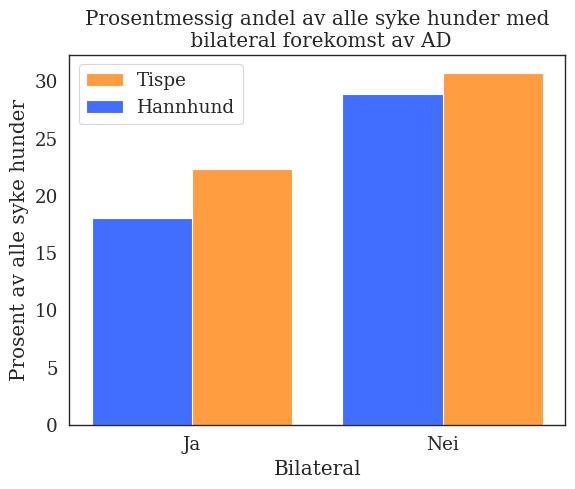

In [30]:

df_syk.loc[df_syk.Høyre==df_syk.Venstre,'Bilateral'] = 'Ja'
df_syk.loc[df_syk.Høyre!=df_syk.Venstre,'Bilateral'] = 'Nei'


plt.figure()
sns.histplot(data=df_syk,x='Bilateral',stat='percent',hue='Kjønn', multiple="dodge", shrink=.8)
plt.ylabel('Prosent av alle syke hunder')
plt.title('Prosentmessig andel av alle syke hunder med\n bilateral forekomst av AD')
plt.legend(['Tispe','Hannhund'])
plt.show()


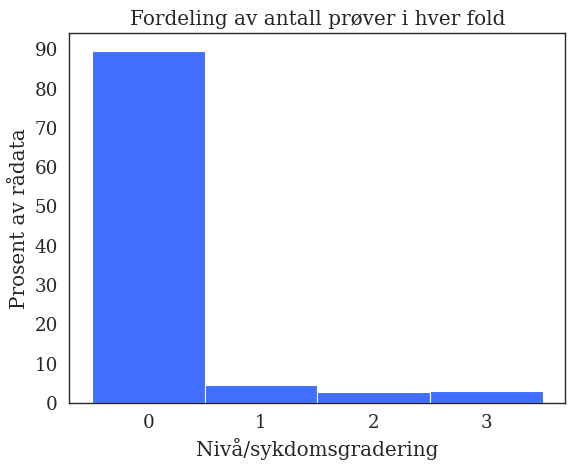

In [31]:

plt.figure()
plt.yticks(np.arange(0,100,10))
sns.histplot(data=meta_df,x='Diagnose',stat='percent',discrete=True)
plt.title('Fordeling av antall prøver i hver fold')
plt.xlabel('Nivå/sykdomsgradering')
plt.ylabel('Prosent av rådata')
plt.xticks(np.arange(4))
plt.grid(visible=False,axis='x')
plt.show()